In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
file_path = 'force2020_data_unsupervised_learning.csv'
data = pd.read_csv(file_path)

In [5]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

In [6]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [7]:
import time
start_time = time.time()
eps = .9 # Set neighborhood radius
min_samples = 5  # Set minimum number of samples per cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)
end_time = time.time()
execution_time = end_time - start_time

In [8]:
#analyze the results
unique_labels = np.unique(dbscan_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise
num_noise = np.sum(dbscan_labels == -1)
print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise}")

Number of clusters: 5
Number of noise points: 37


In [9]:
if num_clusters > 1:
    silhouette_avg = silhouette_score(data_scaled, dbscan_labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    silhouette_avg = None
    print("Silhouette Score cannot be computed (only one cluster or all points are noise).")

Silhouette Score: 0.6474895150310701


In [10]:
# Dimensionality reduction for visualization (using PCA)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

C:\Users\saad hazem\AppData\Local\Temp\ipykernel_16664\2028171811.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


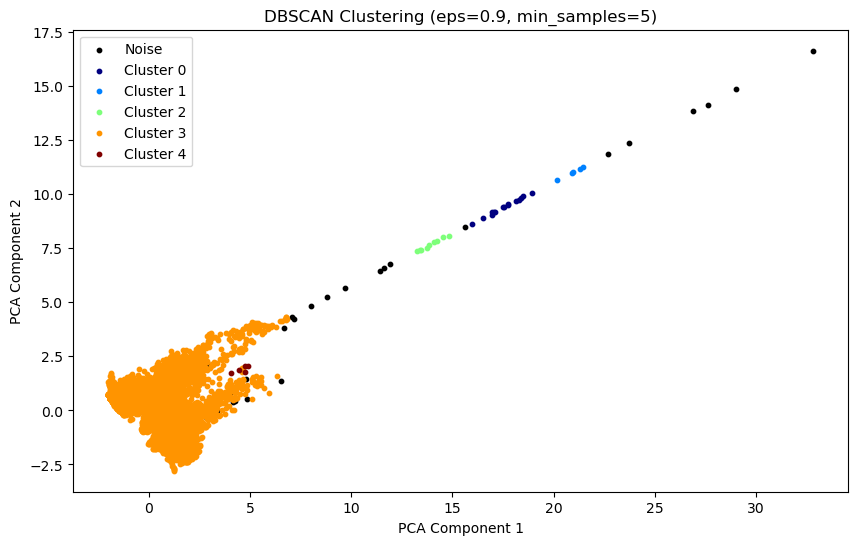

In [11]:
plt.figure(figsize=(10, 6))
for label in unique_labels:
    if label == -1:
        # Noise points
        color = 'k'
        label_name = 'Noise'
    else:
        color = plt.cm.jet(float(label) / max(unique_labels))  # Color for each cluster
        label_name = f"Cluster {label}"
    plt.scatter(
        data_reduced[dbscan_labels == label, 0],
        data_reduced[dbscan_labels == label, 1],
        c=color,
        label=label_name,
        s=10
    )

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [12]:
import nbformat
from nbconvert import ScriptExporter

def convert_notebook_to_script(notebook_path, output_path):
    # Load the notebook
    with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
        notebook_content = nbformat.read(notebook_file, as_version=4)
    
    # Initialize the script exporter
    script_exporter = ScriptExporter()
    
    # Export the notebook to a Python script
    script_content, _ = script_exporter.from_notebook_node(notebook_content)
    
    # Write the Python script to the output path
    with open(output_path, 'w', encoding='utf-8') as script_file:
        script_file.write(script_content)

# Example usage
notebook_file_path = "dbscan.ipynb"  # Replace with your notebook's file path
output_script_path = "output_script.py"    # Replace with your desired output path
convert_notebook_to_script(notebook_file_path, output_script_path)
print(f"Notebook converted to Python script at: {output_script_path}")

Notebook converted to Python script at: output_script.py


In [14]:
from sklearn.metrics import davies_bouldin_score

# Exclude noise points for DBI calculation
mask = dbscan_labels != -1  # Filter for points not labeled as noise
filtered_data = data_scaled[mask]
filtered_labels = dbscan_labels[mask]

if len(np.unique(filtered_labels)) > 1:  # Ensure there are at least 2 clusters
    dbi_dbscan = davies_bouldin_score(filtered_data, filtered_labels)
    print(f"Davies-Bouldin Index for DBSCAN: {dbi_dbscan}")
else:
    print("Davies-Bouldin Index cannot be computed (only one cluster or insufficient points after filtering noise).")

print(f"Execution Time for dbscan: {execution_time:.4f} seconds")


Davies-Bouldin Index for DBSCAN: 0.3114779898593888
Execution Time for dbscan: 4.5381 seconds
